# 11. Visualization

## Exercise 43 - Cities

In [592]:
# load in JSON
cities = pd.read_json(root_path + 'cities.json')
cities.head()

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
0,New York,4.8%,40.71,-74.01,8405837,1,New York
1,Los Angeles,4.8%,34.05,-118.24,3884307,2,California
2,Chicago,-6.1%,41.88,-87.63,2718782,3,Illinois
3,Houston,11.0%,29.76,-95.37,2195914,4,Texas
4,Philadelphia,2.6%,39.95,-75.17,1553165,5,Pennsylvania


<Axes: xlabel='state'>

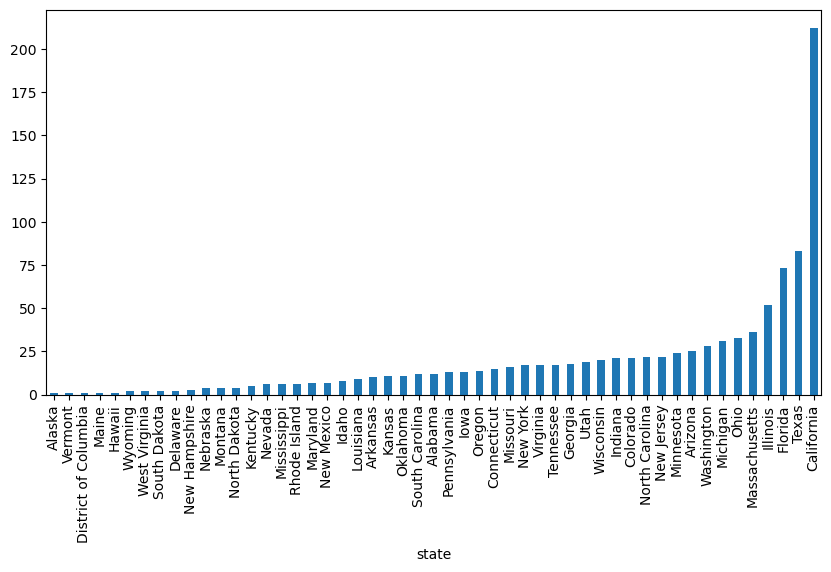

In [593]:
# create bar plot showing how many of top 1,000 cities are in each state
cities.groupby('state')['city'].count().sort_values().plot.bar(figsize=(10, 5))

<Axes: xlabel='city'>

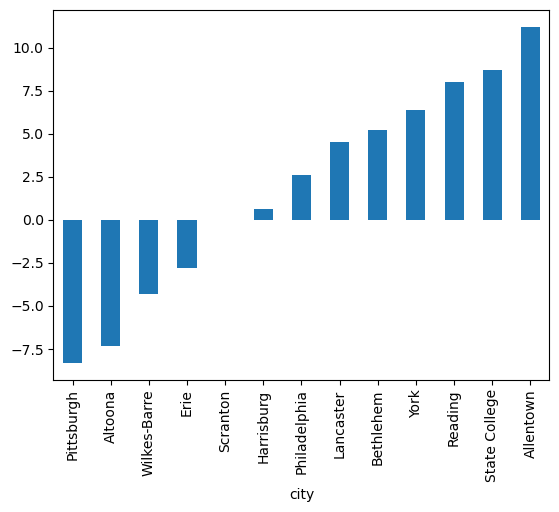

In [594]:
# bar plot comparing growth of all cities in state of PA
(
    cities.loc[cities['state'] == 'Pennsylvania', ['city', 'growth_from_2000_to_2013']]
    .set_index('city')
    ['growth_from_2000_to_2013']
    .str.strip('%')
    .astype(np.float16)
    .sort_values()
    .plot.bar()
)

<Axes: ylabel='population'>

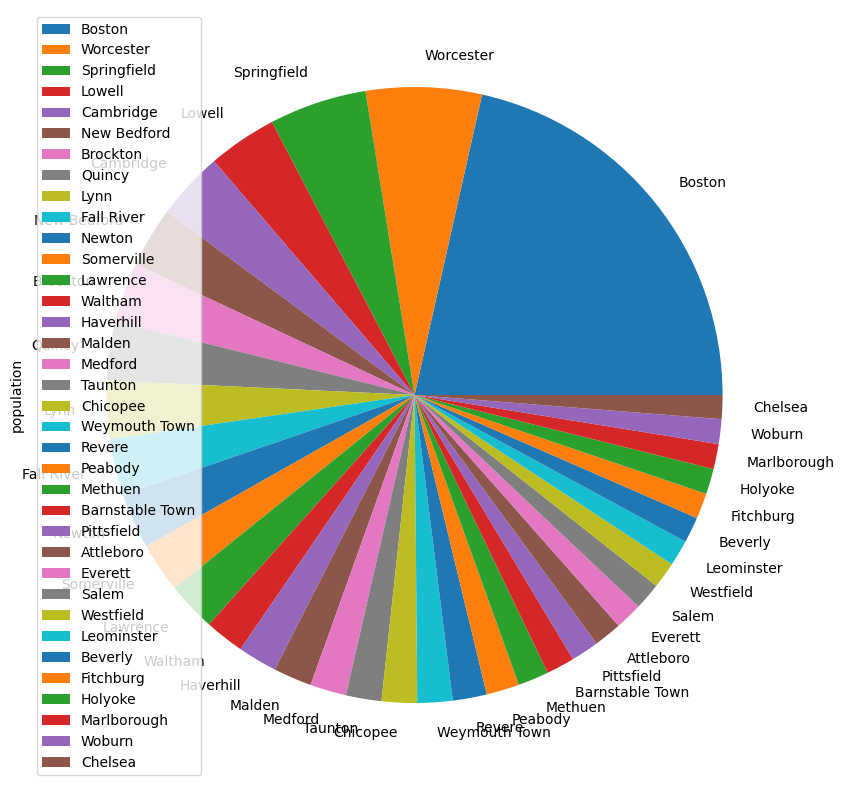

In [595]:
# pie plot showing how much each Massachusetts city in list contributes to overall population
(
    cities.loc[cities['state'] == 'Massachusetts', ['city', 'population']]
    .set_index('city')
    .plot.pie(y='population', figsize=(10, 10))
)

<Axes: xlabel='longitude', ylabel='latitude'>

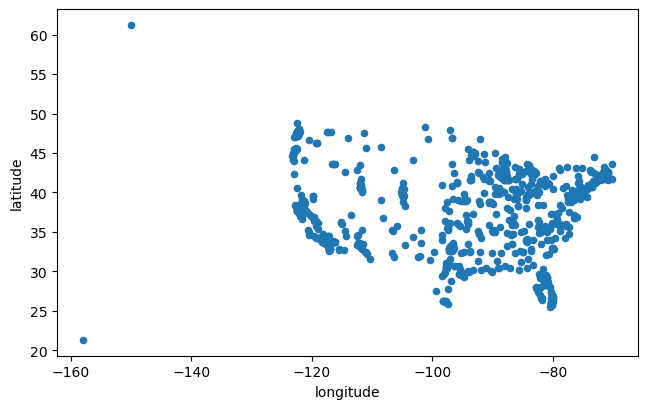

In [596]:
# create scatter plot of cities, putting longitude on x-axis and latitude on y-axis
cities[['longitude', 'latitude']].plot.scatter(x='longitude', y='latitude', figsize=(7.5, 4.5))

### Exercise 43b

<Axes: ylabel='Frequency'>

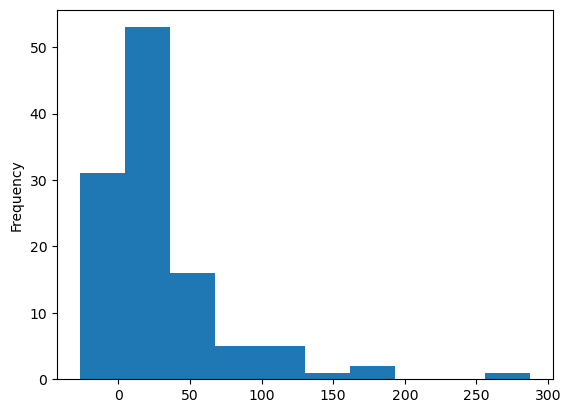

In [598]:
# histogram of growth rates among cities in Texas and Michigan
(
    cities.loc[cities['state'].isin(['Texas', 'Michigan']), 'growth_from_2000_to_2013']
    .str.strip('%')
    .astype(float)
    .plot.hist()
)

<Axes: ylabel='Frequency'>

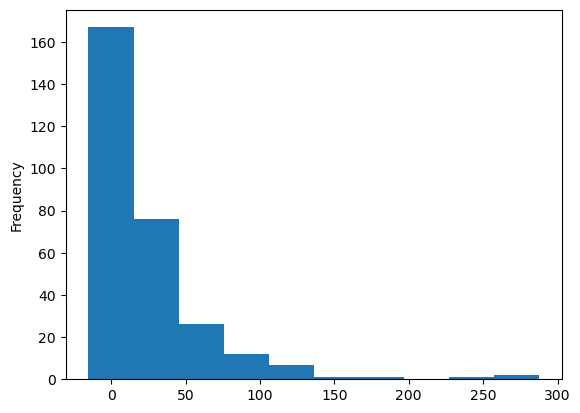

In [599]:
# histogram of growth rates among cities in both Texas and California
(
    cities.loc[cities['state'].isin(['Texas', 'California']), 'growth_from_2000_to_2013']
    .str.strip('%')
    .replace('', np.NaN)
    .astype(float)
    .plot.hist()
)

<Axes: xlabel='state'>

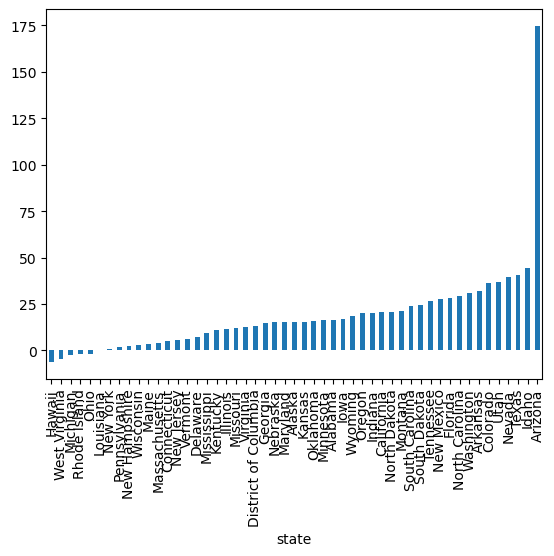

In [600]:
# bar plot of average growth per state
cities['growth_from_2000_to_2013'] = cities['growth_from_2000_to_2013'].str.strip('%').replace('', np.NaN).astype(float)
(
    cities.groupby('state')
    ['growth_from_2000_to_2013']
    .mean()
    .sort_values()
    .plot.bar()
)

## Exercise 44 - Boxplotting weather

In [602]:
# load in CSV, specify columns, no header, rename, parse dates, set 'date_time' as index
chicago = pd.read_csv(root_path + 'chicago,il.csv',
                      usecols=[0, 1,2],
                      header=0,
                      names=['date_time','maxtemp', 'mintemp'],
                      parse_dates=['date_time'],
                      index_col=['date_time'])
chicago.head()

,maxtemp,mintemp
date_time,,
2018-12-11 00:00:00,1,-2
2018-12-11 03:00:00,1,-2
2018-12-11 06:00:00,1,-2
2018-12-11 09:00:00,1,-2
2018-12-11 12:00:00,1,-2


<Axes: >

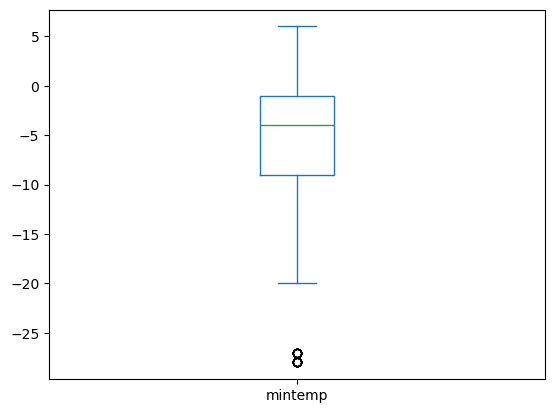

In [603]:
# create boxplot of min temps
chicago['mintemp'].plot.box()

In [604]:
# find values represented as dots on the boxplot
IQR = chicago['mintemp'].quantile(.75) - chicago['mintemp'].quantile(.25)
chicago.loc[chicago['mintemp'] < chicago['mintemp'].quantile(.25) - (1.5 * IQR)]

,maxtemp,mintemp
date_time,,
2019-01-30 00:00:00,-25,-28
2019-01-30 03:00:00,-25,-28
2019-01-30 06:00:00,-25,-28
2019-01-30 09:00:00,-25,-28
2019-01-30 12:00:00,-25,-28
2019-01-30 15:00:00,-25,-28
2019-01-30 18:00:00,-25,-28
2019-01-30 21:00:00,-25,-28
2019-01-31 00:00:00,-17,-27


<Axes: >

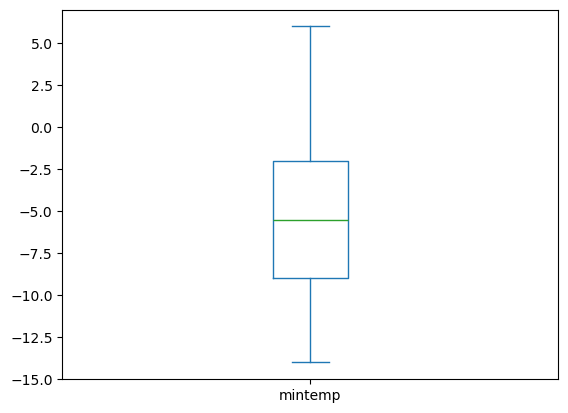

In [605]:
# create boxplot of Chicago's min temps in February
chicago.loc['2019-02', 'mintemp'].plot.box()

<Axes: >

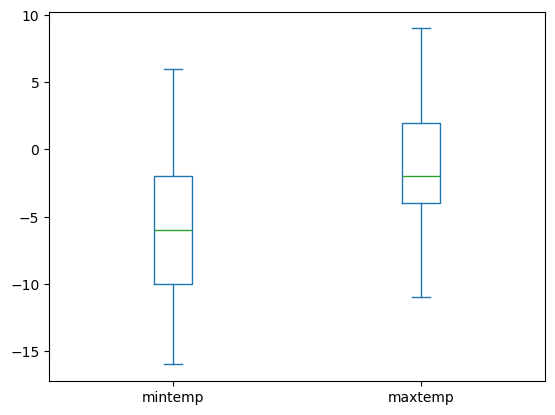

In [606]:
# create side-by-side boxplot of Chicago's minimum and maximum temps in February and March
chicago.loc['2019-02':'2019-03', ['mintemp', 'maxtemp']].plot.box()

In [607]:
# read in Los Angeles, Boston data, add "city" column and combine dfs

chicago = pd.read_csv(root_path + 'chicago,il.csv',
                      parse_dates=['date_time'],
                      names=['date_time', 'mintemp', 'maxtemp'],
                      usecols=['date_time', 'mintemp', 'maxtemp'],
                      index_col=['date_time'],
                      header=0)
chicago['city'] = 'Chicago'

la = pd.read_csv(root_path + 'los+angeles,ca.csv',
                      parse_dates=['date_time'],
                      names=['date_time', 'mintemp', 'maxtemp'],
                      usecols=['date_time', 'mintemp', 'maxtemp'],
                      index_col=['date_time'],
                      header=0)
la['city'] = 'Los Angeles'

boston = pd.read_csv(root_path + 'boston,ma.csv',
                      parse_dates=['date_time'],
                      names=['date_time', 'mintemp', 'maxtemp'],
                      usecols=['date_time', 'mintemp', 'maxtemp'],
                      index_col=['date_time'],
                      header=0)
boston['city'] = 'Boston'

city_temps = pd.concat([chicago, la, boston])
city_temps

,mintemp,maxtemp,city
date_time,,,
2018-12-11 00:00:00,1,-2,Chicago
2018-12-11 03:00:00,1,-2,Chicago
2018-12-11 06:00:00,1,-2,Chicago
2018-12-11 09:00:00,1,-2,Chicago
2018-12-11 12:00:00,1,-2,Chicago
...,...,...,...
2019-03-11 09:00:00,8,2,Boston
2019-03-11 12:00:00,8,2,Boston
2019-03-11 15:00:00,8,2,Boston


In [608]:
# get descriptive stats for mintemp and maxtemp grouped by city
city_temps.groupby('city')['mintemp'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Boston,728.00,2.87,4.95,-12.00,0.00,2.00,6.00,17.00
Chicago,728.00,-0.74,6.13,-25.00,-3.00,0.00,3.00,9.00
Los Angeles,728.00,17.05,2.71,12.00,15.00,16.00,19.00,23.00


city
Boston         Axes(0.125,0.11;0.775x0.77)
Chicago        Axes(0.125,0.11;0.775x0.77)
Los Angeles    Axes(0.125,0.11;0.775x0.77)
dtype: object

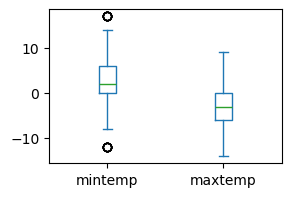

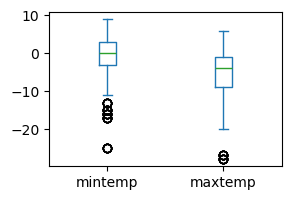

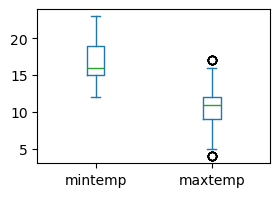

In [609]:
# create side-by-side boxplots showing min and max temp for each of 3 cities
city_temps.groupby('city')[['mintemp', 'maxtemp']].plot.box(figsize=(3,2))

maxtemp       Axes(0.125,0.11;0.352273x0.77)
mintemp    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

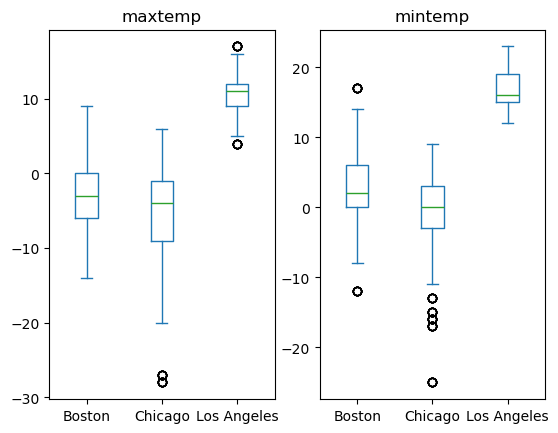

In [610]:
# or, all on one graph
city_temps.plot.box(column=['mintemp', 'maxtemp'], by='city')

### Exercise 44b

In [612]:
# begin with empty dataframe and use for loop to load data from all three cities

csv_list = ['chicago,il.csv', 'los+angeles,ca.csv', 'boston,ma.csv']
city_list = ['Chicago', 'Los Angeles', 'Boston']

dfs_list = []

for file, city in zip(csv_list, city_list):
    df = pd.read_csv(root_path + file,
                     parse_dates=['date_time'],
                     names=['date_time', 'mintemp', 'maxtemp'],
                     usecols=['date_time', 'mintemp', 'maxtemp'],
                     header=0)
    df['city'] = city
    dfs_list.append(df)

city_temps = pd.concat(dfs_list)
city_temps = city_temps.set_index('date_time')
city_temps

,mintemp,maxtemp,city
date_time,,,
2018-12-11 00:00:00,1,-2,Chicago
2018-12-11 03:00:00,1,-2,Chicago
2018-12-11 06:00:00,1,-2,Chicago
2018-12-11 09:00:00,1,-2,Chicago
2018-12-11 12:00:00,1,-2,Chicago
...,...,...,...
2019-03-11 09:00:00,8,2,Boston
2019-03-11 12:00:00,8,2,Boston
2019-03-11 15:00:00,8,2,Boston


In [613]:
# for each city, calculate mean and median for mintemp and maxtemp
city_temps.groupby('city')[['mintemp', 'maxtemp']].describe().T.loc[(slice(None), ['mean', '50%']), :]

city          Boston  Chicago  Los Angeles
mintemp mean    2.87    -0.74        17.05
        50%     2.00     0.00        16.00
maxtemp mean   -3.14    -5.08        10.64
        50%    -3.00    -4.00        11.00

city
Boston         Axes(0.125,0.11;0.775x0.77)
Chicago        Axes(0.125,0.11;0.775x0.77)
Los Angeles    Axes(0.125,0.11;0.775x0.77)
Name: mintemp, dtype: object

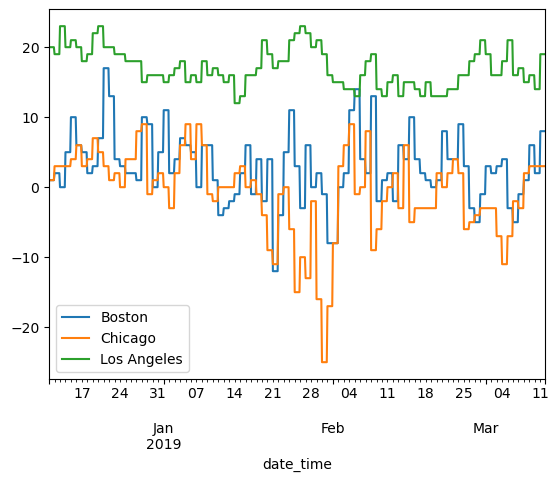

In [614]:
# create line plot showing mintemp in each city
# x-scale shows dates, y-axis showws temps, different line for each city
city_temps.groupby('city')['mintemp'].plot.line(legend=True)

## Exercise 45 - Taxi fare breakdown

In [616]:
# load in data as specified
csv_suffix_list = ['2019-01.csv', '2019-07.csv', '2020-01.csv', '2020-07.csv']
df_list = []

for file_name in csv_suffix_list:
    df = pd.read_csv(root_path + 'nyc_taxi_' + file_name,
                     usecols=['tpep_pickup_datetime',
                              'passenger_count',
                              'trip_distance',
                              'fare_amount',
                              'extra',
                              'mta_tax',
                              'tip_amount',
                              'tolls_amount',
                              'improvement_surcharge',
                              'total_amount',
                              'congestion_surcharge'],
                     parse_dates=['tpep_pickup_datetime'],
                     index_col=['tpep_pickup_datetime'])
    df_list.append(df)

taxi = pd.concat(df_list)
taxi.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
tpep_pickup_datetime,,,,,,,,,,
2019-01-01 00:46:40,1.00,1.50,7.00,0.50,0.50,1.65,0.00,0.30,9.95,NaN
2019-01-01 00:59:47,1.00,2.60,14.00,0.50,0.50,1.00,0.00,0.30,16.30,NaN
2018-12-21 13:48:30,3.00,0.00,4.50,0.50,0.50,0.00,0.00,0.30,5.80,NaN
2018-11-28 15:52:25,5.00,0.00,3.50,0.50,0.50,0.00,0.00,0.30,7.55,NaN
2018-11-28 15:56:57,5.00,0.00,52.00,0.00,0.50,0.00,0.00,0.30,55.55,NaN


In [617]:
# reset index
taxi = taxi.reset_index()
taxi.head()

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2019-01-01 00:46:40,1.00,1.50,7.00,0.50,0.50,1.65,0.00,0.30,9.95,NaN
1,2019-01-01 00:59:47,1.00,2.60,14.00,0.50,0.50,1.00,0.00,0.30,16.30,NaN
2,2018-12-21 13:48:30,3.00,0.00,4.50,0.50,0.50,0.00,0.00,0.30,5.80,NaN
3,2018-11-28 15:52:25,5.00,0.00,3.50,0.50,0.50,0.00,0.00,0.30,7.55,NaN
4,2018-11-28 15:56:57,5.00,0.00,52.00,0.00,0.50,0.00,0.00,0.30,55.55,NaN


<Axes: xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

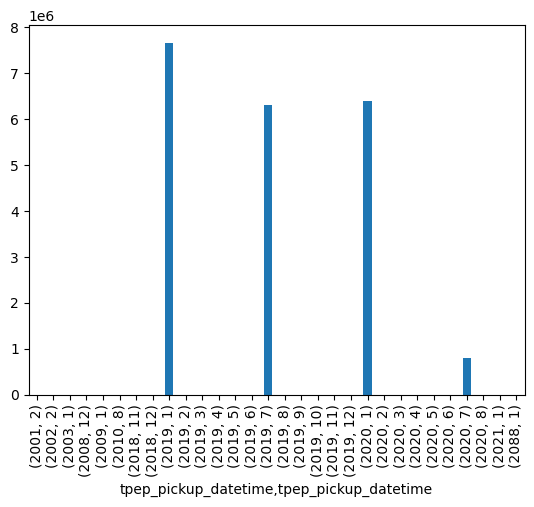

In [618]:
# create bar plot showing how many rides took place during each month and year
taxi.groupby([taxi['tpep_pickup_datetime'].dt.year, taxi['tpep_pickup_datetime'].dt.month])['trip_distance'].count().plot.bar()

<Axes: xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

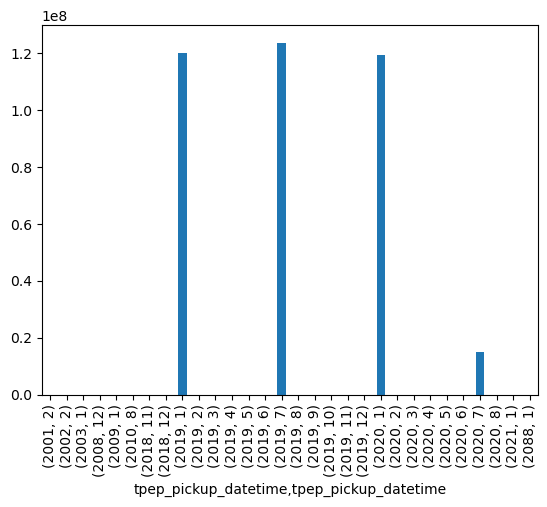

In [619]:
# create bar plot showing total amount paid in taxi rides for every year and month of the data set
taxi.groupby([taxi['tpep_pickup_datetime'].dt.year, taxi['tpep_pickup_datetime'].dt.month])['total_amount'].sum().plot.bar()

<Axes: xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

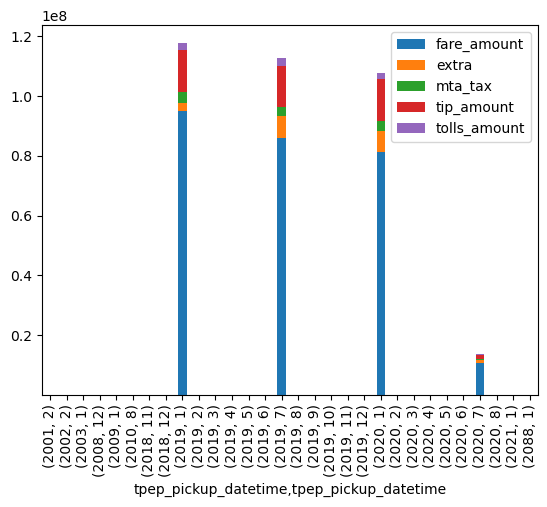

In [620]:
# create bar plot showing 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount' per month and year
# with various components stacked in single bar

pay_components = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount']
(
    taxi.groupby([taxi['tpep_pickup_datetime'].dt.year, taxi['tpep_pickup_datetime'].dt.month])
    [pay_components].sum()
    .plot.bar(stacked=True)
)

<Axes: xlabel='passenger_count'>

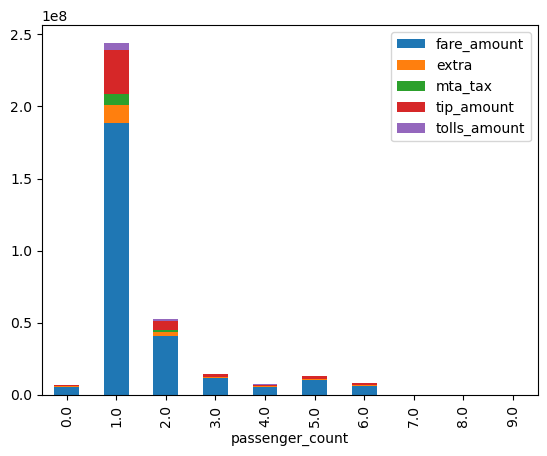

In [621]:
# per number of passengers

(
    taxi.groupby('passenger_count')
    [pay_components].sum()
    .plot.bar(stacked=True)
)

<Axes: ylabel='Frequency'>

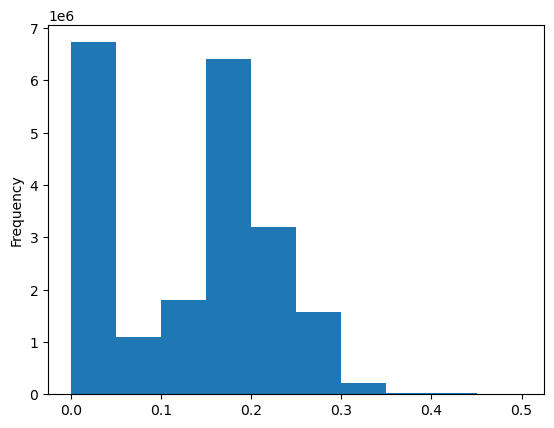

In [622]:
# histogram showing frequency of each tipping percentage between (and including) 0% and 50%
taxi['tip_pct'] = taxi['tip_amount'] / (taxi['total_amount'] - taxi['tip_amount'])

(
    taxi.loc[taxi['fare_amount'] > 0]
    .loc[(taxi['tip_pct'] >=0) & (taxi['tip_pct'] <= 0.5), 'tip_pct']
    .plot.hist()
)
                                                                                                                                                                                       

### Exercise 45b

In [624]:
# set index
taxi = taxi.set_index('tpep_pickup_datetime')

In [625]:
# ensure dayofweek displays as intended
taxi.index.dayofweek

Index([1, 1, 4, 2, 2, 2, 2, 1, 1, 1,
       ...
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
      dtype='int32', name='tpep_pickup_datetime', length=21183631)

<Axes: >

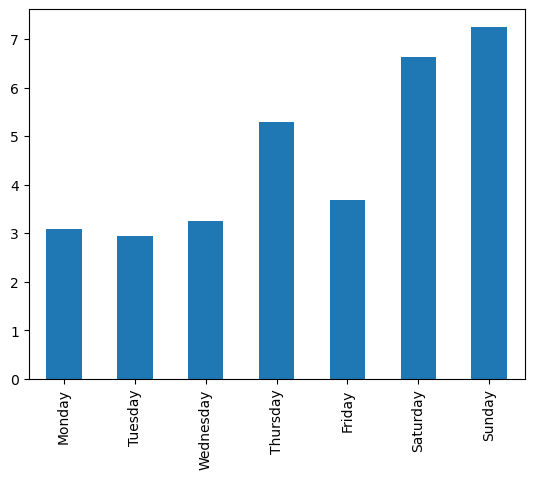

In [626]:
# create bar plot showing average distance traveled per day of the week in July 2020, x-axis with day name
dow_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


(
    taxi.loc['2020-07']
    .assign(day = lambda df:df.index.dayofweek)
    .groupby('day')
    ['trip_distance'].mean()
    .set_axis(dow_list)
    .plot.bar()
)

<Axes: xlabel='trip_distance', ylabel='total_amount'>

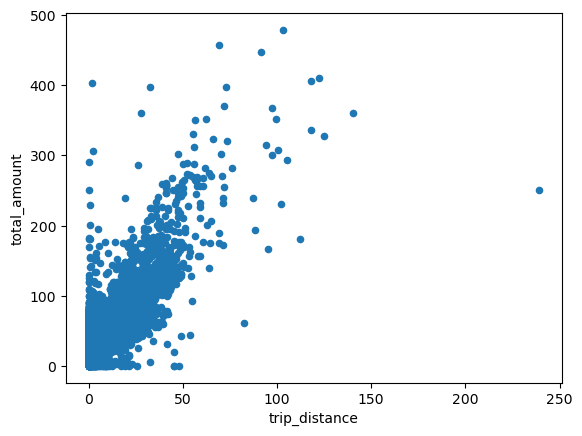

In [627]:
# scatter plot of july 2020 comparing "trip_distance" with "total_amount"
# ignore rides where either value <= 0 or > 500

(
    taxi.loc['2020-07', ['trip_distance', 'total_amount']]
    .loc[lambda df: (df['trip_distance'] > 0) & (df['trip_distance'] <= 500)]
    .loc[lambda df: (df['total_amount'] > 0) & (df['total_amount'] <= 500)]
    .plot.scatter(x='trip_distance', y='total_amount')
)

<Axes: xlabel='trip_distance', ylabel='passenger_count'>

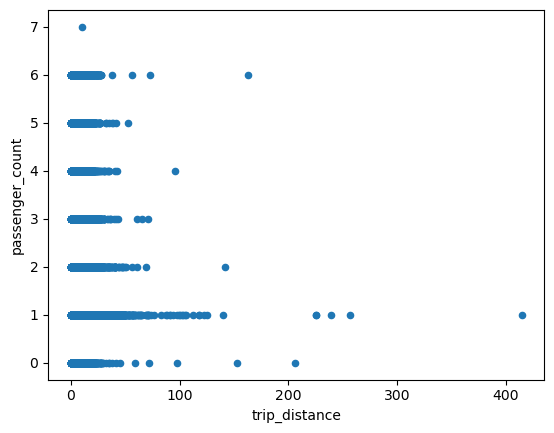

In [628]:
# scatter plot of july 2020, compare "trip_distance" with "passenger_count"
# ignore rides where trip_distance" <= 0 or > 500
(
    taxi.loc['2020-07', ['trip_distance', 'passenger_count']]
    .loc[lambda df: (df['trip_distance'] > 0) & (df['trip_distance'] <= 500)]
    .plot.scatter(x='trip_distance', y='passenger_count')
)

## Exercise 46 - Cars, oil, and ice cream

In [630]:
# read in CSV, rename, parse dates, set 'date' as index, no header
oil = pd.read_csv(root_path + 'wti-daily.csv',
                  names=['date', 'oil'],
                  parse_dates=['date'],
                  index_col=['date'],
                  header=0)
oil.head()

,oil
date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [631]:
# similarly load historical ice cream data for half gallon (1.9 liters)
ice_cream = pd.read_csv(root_path + 'ice-cream.csv',
                        names=['date', 'icecream'],
                        parse_dates=['date'],
                        index_col=['date'],
                        header=0)
ice_cream.head()                        

,icecream
date,
1980-01-01,1.755
1980-02-01,1.775
1980-03-01,1.718
1980-04-01,1.769
1980-05-01,1.822


In [632]:
# set icecream column as floating point, remove other rows
ice_cream['icecream'] = pd.to_numeric(ice_cream['icecream'], errors='coerce')
ice_cream.dtypes

icecream    float64
dtype: object

In [633]:
# load US 'miles traveled per month'
miles = pd.read_csv(root_path + 'miles-traveled.csv',
                    names=['date', 'miles'],
                    parse_dates=['date'],
                    index_col=['date'],
                    header=0)
miles.head()

,miles
date,
1970-01-01,"80,173.00"
1970-02-01,"77,442.00"
1970-03-01,"90,223.00"
1970-04-01,"89,956.00"
1970-05-01,"97,972.00"


In [634]:
# combine into single df with three columns, only include dates in common
corr_df = pd.concat([oil, ice_cream, miles], axis=1, join='inner')
corr_df

,oil,icecream,miles
date,,,
1986-04-01,11.13,2.38,"150,277.00"
1986-05-01,13.80,2.37,"160,459.00"
1986-07-01,12.39,2.37,"171,114.00"
1986-08-01,11.56,2.32,"173,977.00"
1986-10-01,15.23,2.38,"159,434.00"
...,...,...,...
2021-07-01,75.33,4.94,"296,475.00"
2021-09-01,68.63,4.90,"277,979.00"
2021-10-01,76.01,4.95,"285,760.00"


In [635]:
# output numeric correlations
corr_df.corr()

,oil,icecream,miles
oil,1.00,0.78,0.65
icecream,0.78,1.00,0.82
miles,0.65,0.82,1.00


<Axes: xlabel='oil', ylabel='icecream'>

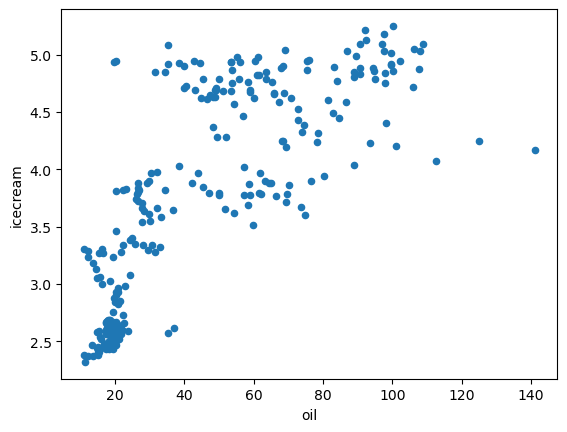

In [636]:
# scatter plot of relationship between oil and icecream
corr_df.plot.scatter(x='oil', y='icecream')

<Axes: xlabel='oil', ylabel='miles'>

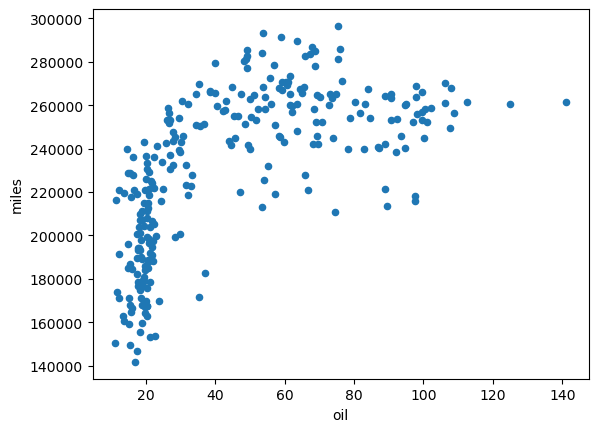

In [637]:
# scatter plot of relationship between oil and miles
corr_df.plot.scatter(x='oil', y='miles')

array([[<Axes: xlabel='oil', ylabel='oil'>,
        <Axes: xlabel='icecream', ylabel='oil'>,
        <Axes: xlabel='miles', ylabel='oil'>],
       [<Axes: xlabel='oil', ylabel='icecream'>,
        <Axes: xlabel='icecream', ylabel='icecream'>,
        <Axes: xlabel='miles', ylabel='icecream'>],
       [<Axes: xlabel='oil', ylabel='miles'>,
        <Axes: xlabel='icecream', ylabel='miles'>,
        <Axes: xlabel='miles', ylabel='miles'>]], dtype=object)

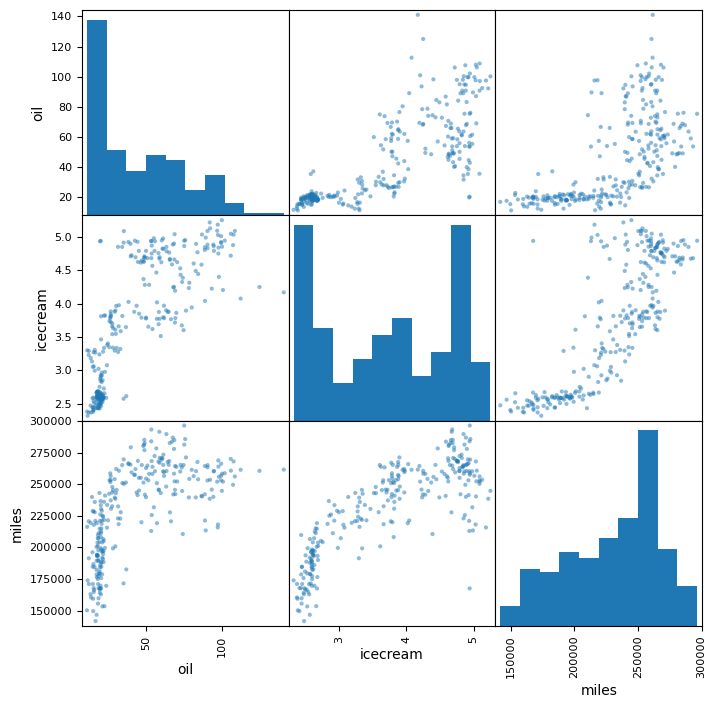

In [638]:
# scatter matrix among all 3 columns
pd.plotting.scatter_matrix(corr_df, figsize=(8, 8))

### Exercise 46b

In [640]:
# is month correlated with any of the values?
corr_df.assign(month = corr_df.index.month).corr()

,oil,icecream,miles,month
oil,1.00,0.78,0.65,0.01
icecream,0.78,1.00,0.82,-0.00
miles,0.65,0.82,1.00,0.08
month,0.01,-0.00,0.08,1.00


array([[<Axes: xlabel='oil', ylabel='oil'>,
        <Axes: xlabel='icecream', ylabel='oil'>,
        <Axes: xlabel='miles', ylabel='oil'>,
        <Axes: xlabel='month', ylabel='oil'>],
       [<Axes: xlabel='oil', ylabel='icecream'>,
        <Axes: xlabel='icecream', ylabel='icecream'>,
        <Axes: xlabel='miles', ylabel='icecream'>,
        <Axes: xlabel='month', ylabel='icecream'>],
       [<Axes: xlabel='oil', ylabel='miles'>,
        <Axes: xlabel='icecream', ylabel='miles'>,
        <Axes: xlabel='miles', ylabel='miles'>,
        <Axes: xlabel='month', ylabel='miles'>],
       [<Axes: xlabel='oil', ylabel='month'>,
        <Axes: xlabel='icecream', ylabel='month'>,
        <Axes: xlabel='miles', ylabel='month'>,
        <Axes: xlabel='month', ylabel='month'>]], dtype=object)

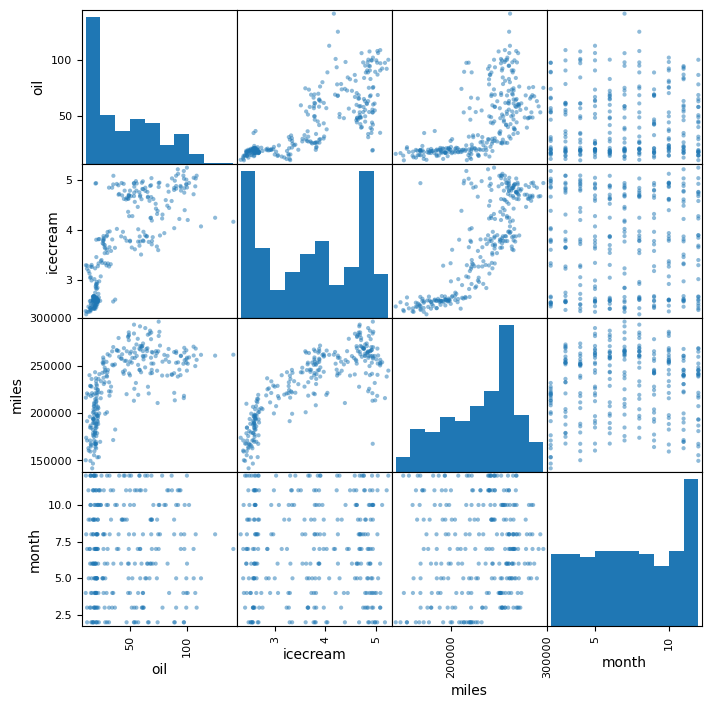

In [641]:
pd.plotting.scatter_matrix(corr_df.assign(month = corr_df.index.month), figsize=(8,8))

<Axes: xlabel='miles', ylabel='icecream'>

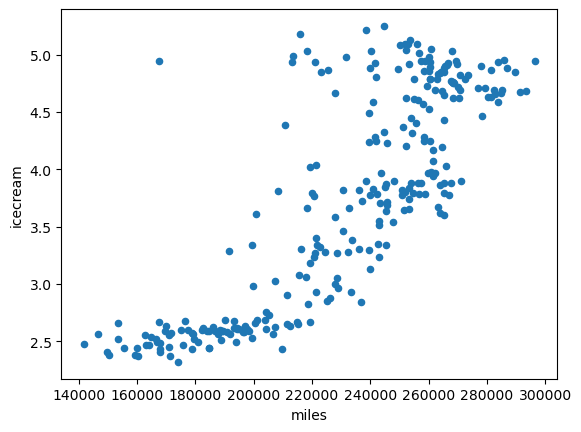

In [642]:
# scatter plot of icecream vs. miles
corr_df.plot.scatter(x='miles', y='icecream')

In [643]:
# instead of inner join, can remove all rows from oil that are not final day of the month
# i think author may have intended first of the month...
corr_df.index.is_month_start.all()

True

In [644]:
# locate start of month prices
oil.loc[oil.index.is_month_start]

,oil
date,
1986-04-01,11.13
1986-05-01,13.80
1986-07-01,12.39
1986-08-01,11.56
1986-10-01,15.23
...,...
2021-07-01,75.33
2021-09-01,68.63
2021-10-01,76.01


## Exercise 47 - Seaborn taxi plots

In [646]:
# create reusable function that loads in data correctly
csv_list = ['nyc_taxi_2020-01.csv', 'nyc_taxi_2020-07.csv']
df_list = []

for file in csv_list:
    df = pd.read_csv(root_path + file,
                     usecols=['tpep_pickup_datetime',
                              'passenger_count',
                              'trip_distance',
                              'total_amount'],
                     parse_dates=['tpep_pickup_datetime'],
                     index_col=['tpep_pickup_datetime'])
    df_list.append(df)
taxi = pd.concat(df_list)
taxi.head()

,passenger_count,trip_distance,total_amount
tpep_pickup_datetime,,,
2020-01-01 00:28:15,1.00,1.20,11.27
2020-01-01 00:35:39,1.00,1.20,12.30
2020-01-01 00:47:41,1.00,0.60,10.80
2020-01-01 00:55:23,1.00,0.80,8.16
2020-01-01 00:01:58,1.00,0.00,4.80


In [647]:
# add 'month' and 'year' columns

taxi['month'] = taxi.index.month_name()
taxi['year'] = taxi.index.year
taxi.head()

,passenger_count,trip_distance,total_amount,month,year
tpep_pickup_datetime,,,,,
2020-01-01 00:28:15,1.00,1.20,11.27,January,2020
2020-01-01 00:35:39,1.00,1.20,12.30,January,2020
2020-01-01 00:47:41,1.00,0.60,10.80,January,2020
2020-01-01 00:55:23,1.00,0.80,8.16,January,2020
2020-01-01 00:01:58,1.00,0.00,4.80,January,2020


In [648]:
# only keep data points where year is 2020 and month is January or July
taxi = taxi.loc[(taxi['year'] == 2020) & (taxi['month'].isin(['January', 'July']))]
taxi

,passenger_count,trip_distance,total_amount,month,year
tpep_pickup_datetime,,,,,
2020-01-01 00:28:15,1.00,1.20,11.27,January,2020
2020-01-01 00:35:39,1.00,1.20,12.30,January,2020
2020-01-01 00:47:41,1.00,0.60,10.80,January,2020
2020-01-01 00:55:23,1.00,0.80,8.16,January,2020
2020-01-01 00:01:58,1.00,0.00,4.80,January,2020
...,...,...,...,...,...
2020-07-19 13:27:52,NaN,24.23,83.50,July,2020
2020-07-19 13:02:00,NaN,4.40,19.78,July,2020
2020-07-19 13:32:00,NaN,8.78,38.45,July,2020


In [649]:
# set new numeric range index numbered starting at 0
taxi = taxi.reset_index()
taxi

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount,month,year
0,2020-01-01 00:28:15,1.00,1.20,11.27,January,2020
1,2020-01-01 00:35:39,1.00,1.20,12.30,January,2020
2,2020-01-01 00:47:41,1.00,0.60,10.80,January,2020
3,2020-01-01 00:55:23,1.00,0.80,8.16,January,2020
4,2020-01-01 00:01:58,1.00,0.00,4.80,January,2020
...,...,...,...,...,...,...
7205199,2020-07-19 13:27:52,NaN,24.23,83.50,July,2020
7205200,2020-07-19 13:02:00,NaN,4.40,19.78,July,2020
7205201,2020-07-19 13:32:00,NaN,8.78,38.45,July,2020
7205202,2020-07-19 13:28:00,NaN,6.50,29.77,July,2020


In [650]:
# assign df to random sample of 1% of the elements in original df
taxi = taxi.sample(frac=.01, random_state=0)
taxi

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount,month,year
7201592,2020-07-18 13:44:00,NaN,11.73,49.20,July,2020
3111140,2020-01-16 19:05:14,3.00,0.78,12.25,January,2020
3854818,2020-01-20 15:57:03,1.00,0.91,12.09,January,2020
427261,2020-01-03 16:44:46,1.00,22.31,65.92,January,2020
234275,2020-01-02 13:19:53,1.00,2.03,17.16,January,2020
...,...,...,...,...,...,...
6603763,2020-07-10 11:52:47,1.00,0.98,10.56,July,2020
3230663,2020-01-17 10:21:29,2.00,1.27,14.76,January,2020
3128441,2020-01-16 20:24:15,1.00,3.13,18.96,January,2020
5113155,2020-01-26 11:48:22,1.00,1.22,10.30,January,2020


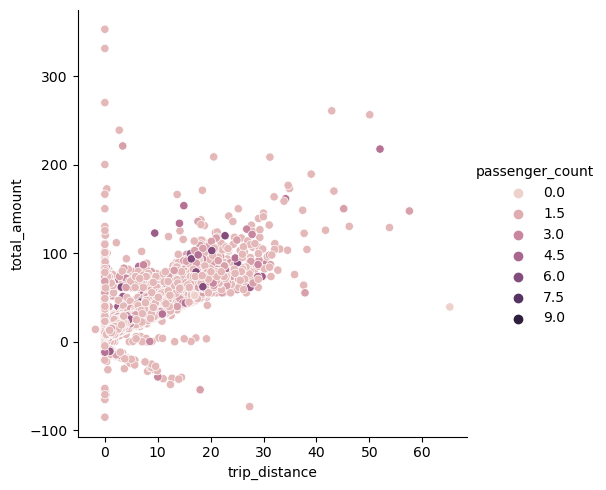

In [651]:
# using Seaborn, create scatter plot
# x-axis = 'trip_distance'
# y-axis = 'total_amount'
# colors set by 'passenger_count'
sns.relplot(data=taxi, x='trip_distance', y='total_amount', hue='passenger_count')

In [652]:
# why are there colors for passenger counts 1.5, 4.5, 7.5?
taxi['passenger_count'].value_counts()
# seaborn seems to want to plot evenly spaced categories

passenger_count
1.00    50936
2.00    10385
3.00     2829
5.00     2366
6.00     1481
0.00     1376
4.00     1375
9.00        1
Name: count, dtype: int64

D:\Users\perti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\perti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


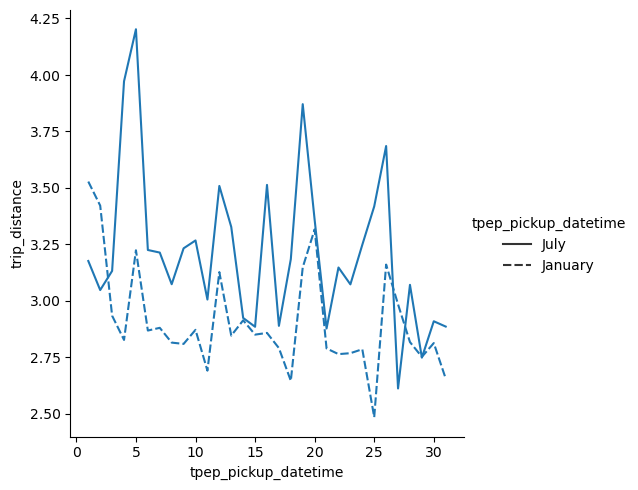

In [653]:
# create line plot showing avg trip distance traveled on each day of January and July
(
    sns.relplot(data=taxi,
                kind='line',
                x=taxi['tpep_pickup_datetime'].dt.day.replace([np.inf, -np.inf], np.nan),
                y=taxi['trip_distance'].replace([np.inf, -np.inf], np.nan),
                style=taxi['tpep_pickup_datetime'].dt.month_name(),
                errorbar=None)
)

# attempted to resolve errors by removing potential np.inf values, but did not find any
# does not affect the display of the graph as intended

In [654]:
# create day column for ease of use
taxi['day'] = taxi['tpep_pickup_datetime'].dt.day

<Axes: xlabel='day', ylabel='count'>

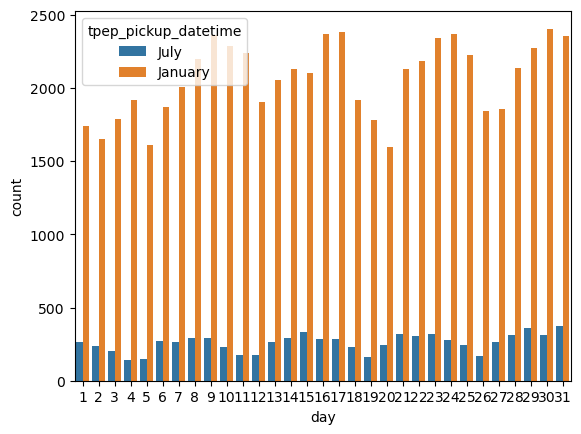

In [655]:
# show number of trips taken each day of both months
# x-axis day of month
# y-axis number of trips


(
    sns.countplot(data=taxi,
                  x='day',
                  hue=taxi['tpep_pickup_datetime'].dt.month_name())
)

In [656]:
taxi['month'] = taxi['tpep_pickup_datetime'].dt.month_name()

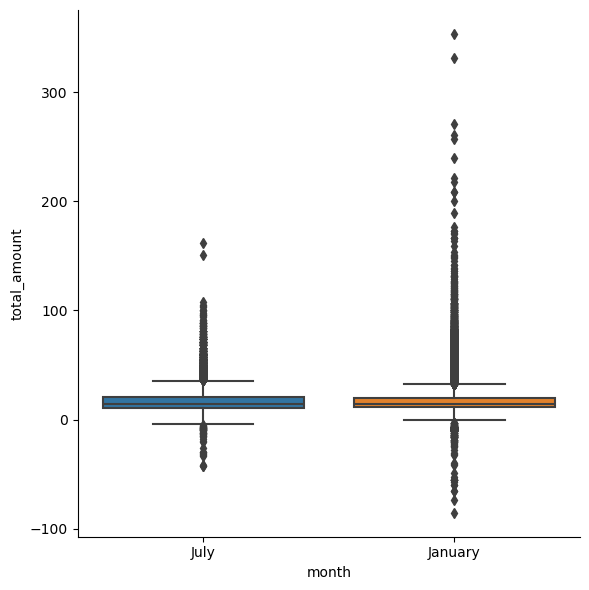

In [657]:
# create boxplot of 'total_amount', one plot for each month

(
    sns.catplot(data=taxi,
                x='month',
                y='total_amount',
                kind='box',
                height=6)
)       

### Exercise 47b

In [659]:
# load data for 2019 and 2020, January and July
csv_list = ['2019-01', '2019-07', '2020-01', '2020-07']
df_list = []

for file in csv_list:
    df = pd.read_csv(root_path + 'nyc_taxi_' + file + '.csv',
                     usecols=['tpep_pickup_datetime',
                              'passenger_count',
                              'trip_distance',
                              'total_amount'],
                     parse_dates=['tpep_pickup_datetime'],
                     index_col=['tpep_pickup_datetime'])
    df_list.append(df)
taxi = pd.concat(df_list)
taxi.head()

,passenger_count,trip_distance,total_amount
tpep_pickup_datetime,,,
2019-01-01 00:46:40,1.00,1.50,9.95
2019-01-01 00:59:47,1.00,2.60,16.30
2018-12-21 13:48:30,3.00,0.00,5.80
2018-11-28 15:52:25,5.00,0.00,7.55
2018-11-28 15:56:57,5.00,0.00,55.55


In [660]:
# remove data outside correct range
taxi = taxi.loc[(taxi.index.year.isin([2019, 2020])) & (taxi.index.month.isin([1,7])),:]

In [661]:
# assign columns for date components
taxi['year'] = taxi.index.year
taxi['month'] = taxi.index.month_name()
taxi['day'] = taxi.index.day
taxi.head()

,passenger_count,trip_distance,total_amount,year,month,day
tpep_pickup_datetime,,,,,,
2019-01-01 00:46:40,1.00,1.50,9.95,2019,January,1
2019-01-01 00:59:47,1.00,2.60,16.30,2019,January,1
2019-01-01 00:21:28,1.00,1.30,9.05,2019,January,1
2019-01-01 00:32:01,1.00,3.70,18.50,2019,January,1
2019-01-01 00:57:32,2.00,2.10,13.00,2019,January,1


D:\Users\perti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\perti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\perti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\perti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

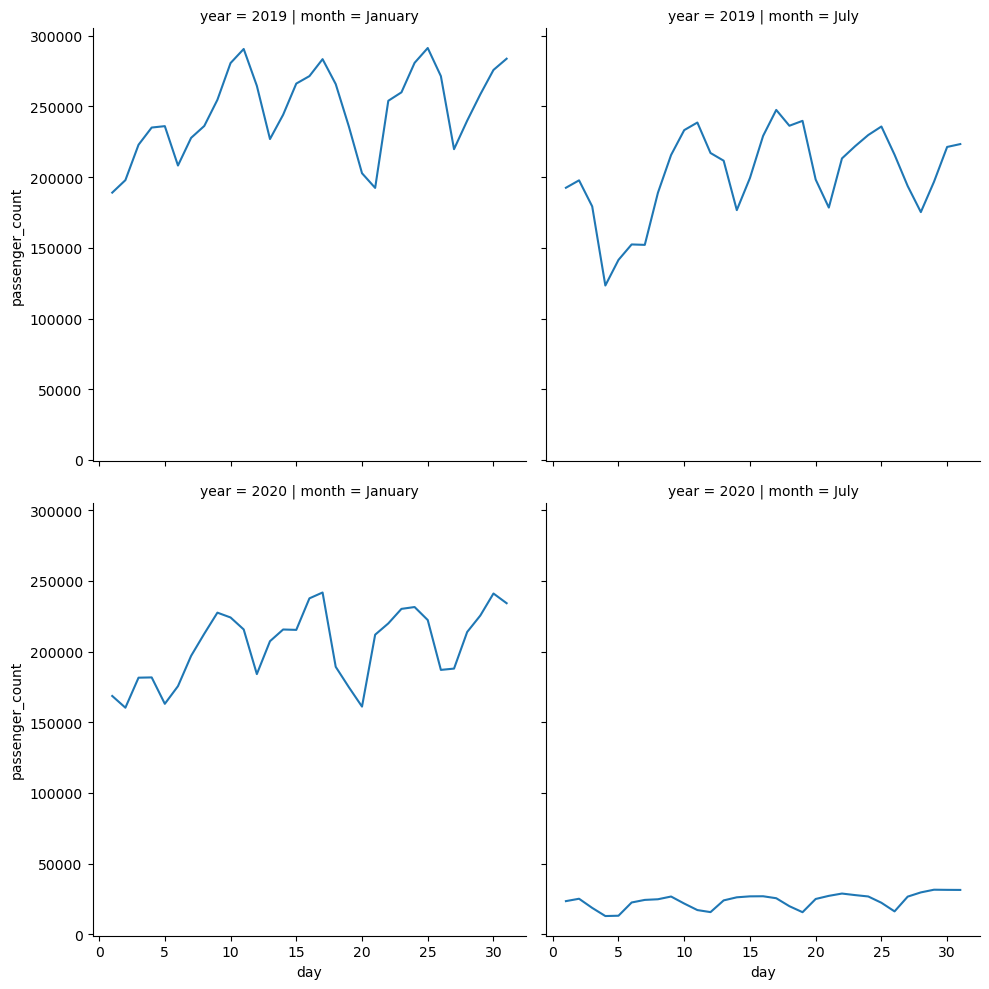

In [662]:
# display number of trips on each day of the month in four separate graphs
(
    sns.relplot(
        data=taxi.groupby(['year', 'month', 'day'])[['passenger_count']].count(),
        x='day',
        y='passenger_count',
        row='year',
        col='month',
        kind='line')
)

In [663]:
# add trip_length column for short, medium, long trips as done in exercise 7

# map to category names

# Short <=2 miles
# Medium >2 & <=10 miles
# Long >10 miles

def categorize(x):
    if x <= 2:
        return 'Short'
    if x > 2 and x <= 10:
        return 'Medium'
    if x > 10:
        return 'Long'

taxi['distance_cat'] = taxi['trip_distance'].apply(categorize)
taxi.head()

,passenger_count,trip_distance,total_amount,year,month,day,distance_cat
tpep_pickup_datetime,,,,,,,
2019-01-01 00:46:40,1.00,1.50,9.95,2019,January,1,Short
2019-01-01 00:59:47,1.00,2.60,16.30,2019,January,1,Medium
2019-01-01 00:21:28,1.00,1.30,9.05,2019,January,1,Short
2019-01-01 00:32:01,1.00,3.70,18.50,2019,January,1,Medium
2019-01-01 00:57:32,2.00,2.10,13.00,2019,January,1,Medium


In [664]:
# show trip distance per day of month in three plots alongside one another, one for each category
grouped = taxi.groupby(['day', 'distance_cat'])['trip_distance'].mean().reset_index()
grouped.head()

,day,distance_cat,trip_distance
0,1,Long,15.94
1,1,Medium,4.17
2,1,Short,1.11
3,2,Long,15.97
4,2,Medium,4.05


D:\Users\perti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\perti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\perti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\perti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

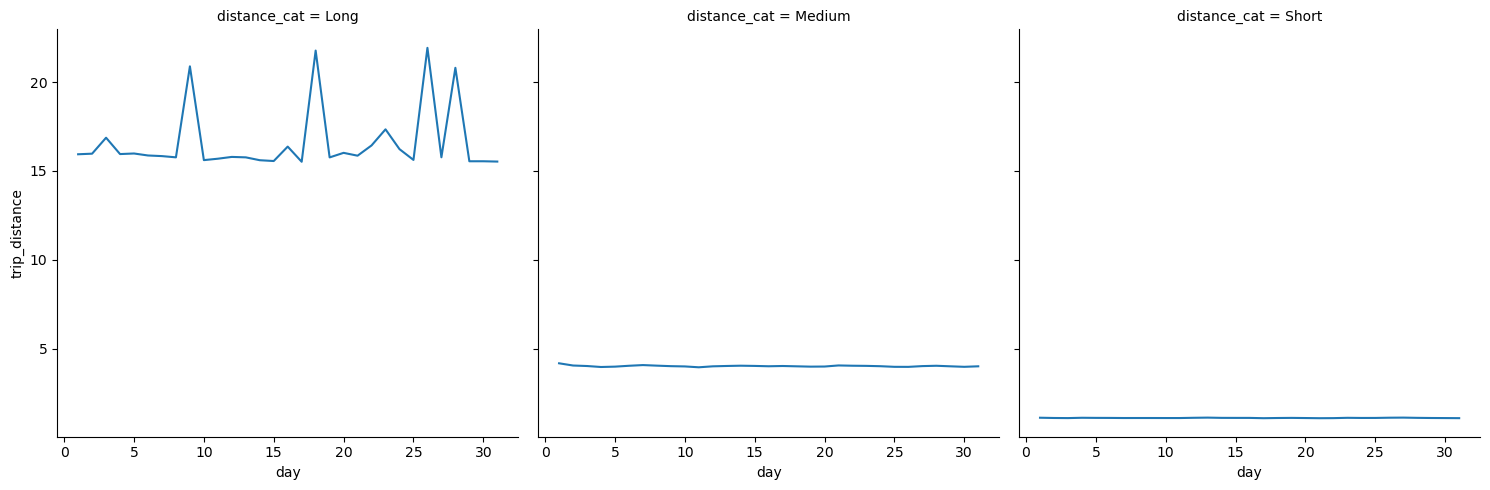

In [665]:
(
    sns.relplot(data=grouped,
                x='day',
                y='trip_distance',
                col='distance_cat',
                kind='line')
)

In [666]:
# bar plot showing how many rides take place each hour (0-24) in each month
# each month as different color, side by side with each other

# set hour column
taxi['hour'] = taxi.index.hour
taxi.head()

,passenger_count,trip_distance,total_amount,year,month,day,distance_cat,hour
tpep_pickup_datetime,,,,,,,,
2019-01-01 00:46:40,1.00,1.50,9.95,2019,January,1,Short,0
2019-01-01 00:59:47,1.00,2.60,16.30,2019,January,1,Medium,0
2019-01-01 00:21:28,1.00,1.30,9.05,2019,January,1,Short,0
2019-01-01 00:32:01,1.00,3.70,18.50,2019,January,1,Medium,0
2019-01-01 00:57:32,2.00,2.10,13.00,2019,January,1,Medium,0


In [667]:
grouped = taxi.groupby(['month', 'hour'])['passenger_count'].count().reset_index()
grouped.head()

,month,hour,passenger_count
0,January,0,376086
1,January,1,270535
2,January,2,197972
3,January,3,140071
4,January,4,107018


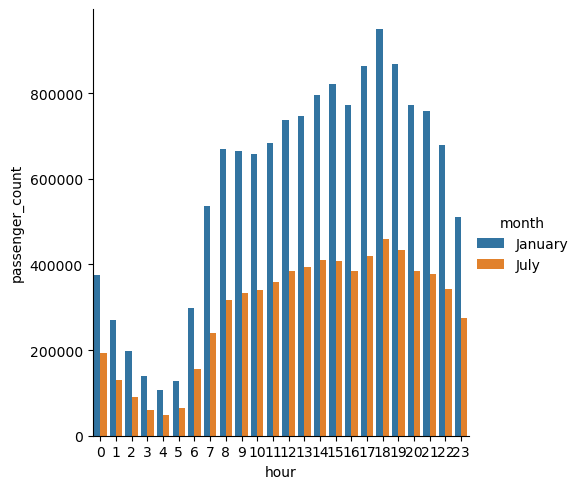

In [668]:
(
    sns.catplot(data=grouped,
                x='hour',
                y='passenger_count',
                hue='month',
                kind='bar')
)

## Chapter 11 Notes
- Box plots helpful in judging initial scaling across multiple columns to see if scaling or additional preprocessing may be required
- When plotting after groupby, specifying single output column plots all groups in same graph. If instead, multiple output columns are specified, they will be plotted on separate graphs.
- df.assign(day=taxi.index.day_name) is helpful to benefit both from the .loc features of a DatetimeIndex while also benefitting from grouping functions by datetime attributes
- pd.plotting.scatter_matrix(df) plots all numeric columns in a scatter matrix
- Series or index can be returned as list at the end with s.to_list() or index.to_list(), respectively, saving time
- Make habit of doing a groupby with .reset_index() at end before plotting with seaborn. "Doing the work for it" seems to work better than trying to allow seaborn to do the grouping with complex queries, which is a potential disadvantage of using the library over other options.